In [2]:
import pandas as pd
from pandas import DataFrame
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart, get_variable_types

In [8]:
filename = 'class_pos_covid.csv'
file_tag = 'covid'
data = pd.read_csv(filename, sep=',', decimal='.', na_values='')

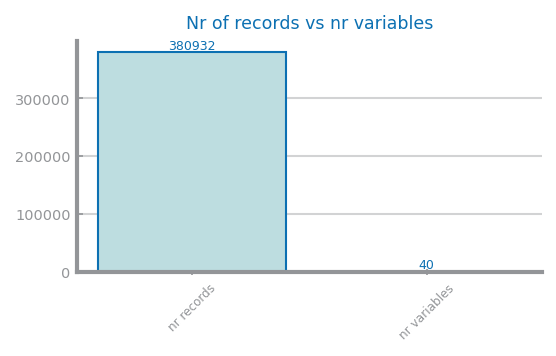

In [10]:

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": data.shape[0], "nr variables": data.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
savefig(f"images/{file_tag}_records_variables.png")
show()